**РК №1 Мкртчян Давид ИУ5-64Б**

**Вариант №11**

**Задача №2.**
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

**Датасет №3.**
https://www.kaggle.com/datasets/carlolepelaars/toy-dataset/data

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import math
%matplotlib inline

df = pd.read_csv("toy_dataset.csv")
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


Размерность и типы данных

In [59]:
print(df.shape)
print(df.dtypes)

(150000, 6)
Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object


Проверка на наличие пустых ячеек

In [60]:
print(df.isnull().sum().sum())

0


Пропусков не обнаружено

Заполним 20 значений в ячейках столбца Gender (категориального признака) пустыми и 20 значений в ячейках столбца Age (количественного признака) пустыми

In [61]:
import pandas as pd
import numpy as np

random_indices_gender = np.random.choice(df.index, size=20, replace=False)
df.loc[random_indices_gender, 'Gender'] = np.nan

random_indices_age = np.random.choice(df.index, size=20, replace=False)
df.loc[random_indices_age, 'Age'] = np.nan

Проверим заполнение пропусками

In [62]:
print(df['Gender'].isnull().sum())
print(df['Age'].isnull().sum())

20
20


Обработка пропусков в категориальном признаке 'Gender'. Используем моду для заполнения пропусков

In [63]:
import pandas as pd
import numpy as np

# Создание временной копии столбца 'Gender' для сравнения
tmp = pd.Series(df['Gender'].copy())

# Заполнение пропущенных значений в столбце 'Gender' модой
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Сравнение изменений между исходным столбцом и его копией
changed_rows = tmp.compare(df['Gender'])

# Вывод строк, которые были изменены
print(changed_rows)

       self other
4897    NaN  Male
8838    NaN  Male
12300   NaN  Male
18033   NaN  Male
29612   NaN  Male
49466   NaN  Male
60106   NaN  Male
75555   NaN  Male
80441   NaN  Male
81653   NaN  Male
83055   NaN  Male
89413   NaN  Male
97437   NaN  Male
98258   NaN  Male
113294  NaN  Male
117410  NaN  Male
140380  NaN  Male
141210  NaN  Male
144261  NaN  Male
145059  NaN  Male


In [64]:
import pandas as pd
import numpy as np

# Создание временной копии столбца 'Age' для сравнения
tmp = pd.Series(df['Age'].copy())

# Заполнение пропущенных значений в столбце 'Age' медианой
df['Age'].fillna(df['Age'].median(), inplace=True)

# Сравнение изменений между исходным столбцом и его копией
changed_rows = tmp.compare(df['Age'])

# Вывод строк, которые были изменены
print(changed_rows)


        self  other
9918     NaN   45.0
17177    NaN   45.0
26696    NaN   45.0
40818    NaN   45.0
40883    NaN   45.0
41534    NaN   45.0
44466    NaN   45.0
55725    NaN   45.0
57705    NaN   45.0
84906    NaN   45.0
91862    NaN   45.0
92392    NaN   45.0
98547    NaN   45.0
102585   NaN   45.0
102612   NaN   45.0
119321   NaN   45.0
119341   NaN   45.0
126277   NaN   45.0
147288   NaN   45.0
148602   NaN   45.0


Контрольная проверка заполнения

In [65]:
print(df['Gender'].isnull().sum())
print(df['Age'].isnull().sum())

0
0


График "Скрипичная диаграмма (violin plot)" для колонки "age"

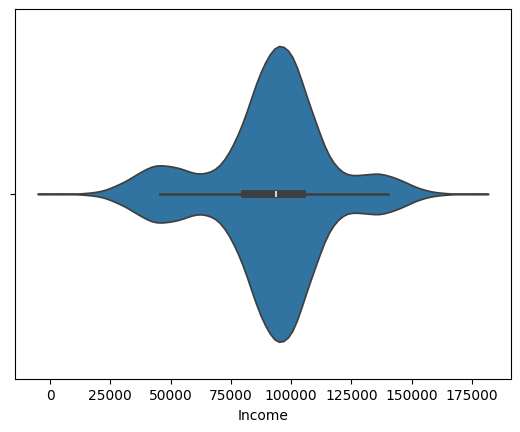

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание скрипичной диаграммы для столбца 'Income'
sns.violinplot(data=df, x="Income")

# Показать график
plt.show()


**Для обработки пропусков в данных из набора данных "Toy Dataset" на Kaggle я использовал следующие способы:**

Обработка пропусков для категориального признака: Использование моды (mode): Мода - это наиболее часто встречающееся значение в наборе данных. Она может быть использована для заполнения пропущенных значений.

Обработка пропусков для количественного признака: Использование медианы (median): Медиана является наиболее подходящим выбором для заполнения пропусков в количественных данных, так как она не подвержена искажению, как среднее значение, при наличии выбросов.

**При выборе признаков для дальнейшего построения моделей машинного обучения, следует учитывать следующие аспекты:**

Важность признака: Некоторые признаки могут быть более важными для предсказания целевой переменной, чем другие. Использование методов, таких как анализ влияния признаков (feature importance analysis), может помочь определить, какие признаки наиболее значимы.

Статистические свойства: Признаки с нормальным распределением и минимальным количеством выбросов обычно являются предпочтительными для моделей машинного обучения.

Корреляция с целевой переменной: Признаки, которые имеют высокую корреляцию с целевой переменной, могут быть более полезными для построения моделей.
Важно провести предварительный анализ данных, чтобы определить, какие признаки наиболее подходят для использования в моделях машинного обучения, и применить соответствующие методы обработки пропусков для каждого типа признака.